# Working with timeseries data
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html  
The most fundamental building block of timeseries data in pandas is the `Timestamp`. It represents a moment in time to the precision of a nanosecond. It is complemented by `Timedelta`, which represents a stretch of time such as "one month", without being fixed to any date and `Period`, which is a combination of the two such as "June 2018". Yet `Period` needs to have a certain regularity, such as every month.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
%matplotlib inline

## Timestamps
Timestamps can be easily created from human readable strings using `pd.datetime`.

In [3]:
pd.to_datetime('2022-06-09')

Timestamp('2022-06-09 00:00:00')

In [4]:
pd.to_datetime('9th June 22')

Timestamp('2022-06-09 00:00:00')

In [5]:
pd.to_datetime('06.09.2022')

Timestamp('2022-06-09 00:00:00')

For non-Americans and people who think that the day should come before the month.

In [6]:
pd.to_datetime('09.06.2022', dayfirst=True)

Timestamp('2022-06-09 00:00:00')

In [7]:
pd.to_datetime('2022-06-09 14:45')

Timestamp('2022-06-09 14:45:00')

In [8]:
date = pd.to_datetime('2022-06-09 14:45:30.600700800')
date

Timestamp('2022-06-09 14:45:30.600700800')

`Timestamps` make all information available via attributes.

In [9]:
date.year

2022

In [10]:
date.month

6

In [11]:
date.day

9

In [12]:
date.second

30

In [13]:
date.microsecond

600700

In [14]:
date.nanosecond

800

Timestamps can be compared:

In [15]:
date1 = pd.to_datetime('2022-06-09 14:45')
date2 = pd.to_datetime('2022-06-09 14:46')
date1 < date2

True

When passed a Series, `to_datetime` returns a Series (with the same index), while a list-like is converted to a DatetimeIndex:

In [18]:
pd.to_datetime(pd.Series(['Jul 31, 2009', '2010-01-10', None]), errors='coerce')

0   2009-07-31
1          NaT
2          NaT
dtype: datetime64[ns]

`Timestamps` can be formatted using a special set of symbols. All of them can be found here https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [21]:
date.strftime('Today is a %A in %B')

'Today is a Thursday in June'

In [22]:
pd.to_datetime('12-11-2010 00:00', format='%m-%d-%Y %H:%M')

Timestamp('2010-12-11 00:00:00')

### DatetimeIndex

Timestamps can be used to index data.

In [23]:
index = pd.DatetimeIndex(['2022-06-16', '2022-06-23',
                          '2022-06-30', '2022-07-07',
                          '2022-07-14'])
schedule = pd.Series(['Statistical Visualization', 'SciPy and Statistical Modeling I',
                      'Statistical Modeling II', 'Creating Experiments',
                      'Performance Optimization'], index=index)
schedule

2022-06-16           Statistical Visualization
2022-06-23    SciPy and Statistical Modeling I
2022-06-30             Statistical Modeling II
2022-07-07                Creating Experiments
2022-07-14            Performance Optimization
dtype: object

In [24]:
schedule['2022-06-10':'2022-06-30']

2022-06-16           Statistical Visualization
2022-06-23    SciPy and Statistical Modeling I
2022-06-30             Statistical Modeling II
dtype: object

In [25]:
dt = pd.to_datetime(['2009/07/31', 'asd'], errors='coerce')
dt

DatetimeIndex(['2009-07-31', 'NaT'], dtype='datetime64[ns]', freq=None)

`isnull()` checks for missing dates in DatetimeIndex-objects (NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike):

In [26]:
dt.isna()

array([False,  True])

## Reading Timeseries Data

In [27]:
!head data/ao_monthly.txt

 1950    1  -0.60310E-01
 1950    2   0.62681E+00
 1950    3  -0.81275E-02
 1950    4   0.55510E+00
 1950    5   0.71577E-01
 1950    6   0.53857E+00
 1950    7  -0.80248E+00
 1950    8  -0.85101E+00
 1950    9   0.35797E+00
 1950   10  -0.37890E+00


Read the data which is in the fixed-width formatted lines format.

In [29]:
ts = pd.read_fwf('data/ao_monthly.txt', header=None, index_col=0)
ts.head()

,1,2
0,,
1950,1,-0.060310
1950,2,0.626810
1950,3,-0.008127
1950,4,0.555100
1950,5,0.071577


This creates an integer index instead of the desired `DateTimeIndex`.

In [30]:
ts.index

Index([1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
       ...
       2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016],
      dtype='int64', name=0, length=798)

In [31]:
ts = pd.read_fwf('data/ao_monthly.txt', header=None, index_col=0,
                 parse_dates=[[0, 1]], infer_datetime_format=True)
ts.head()

/var/folders/8k/0wwh3t85643d42hz6pj740580000gn/T/ipykernel_30658/2449011967.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ts = pd.read_fwf('data/ao_monthly.txt', header=None, index_col=0,


,2
0_1,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008127
1950-04-01,0.555100
1950-05-01,0.071577


In [32]:
ts.index

DatetimeIndex(['1950-01-01', '1950-02-01', '1950-03-01', '1950-04-01',
               '1950-05-01', '1950-06-01', '1950-07-01', '1950-08-01',
               '1950-09-01', '1950-10-01',
               ...
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01'],
              dtype='datetime64[ns]', name='0_1', length=798, freq=None)

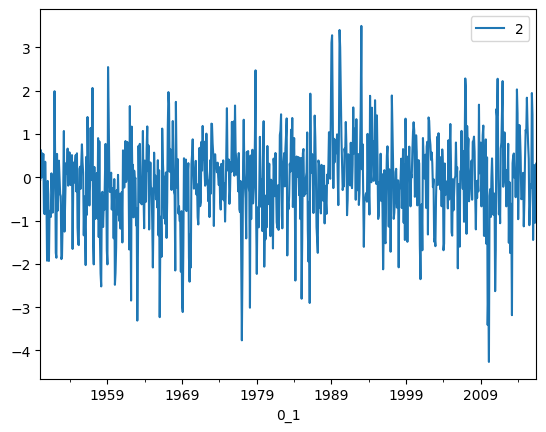

In [33]:
ts.plot();

Now that our series is indexed by timestamps, we can aggregate using time related semantics.

In [34]:
ts.index.year

Index([1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
       ...
       2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016],
      dtype='int32', name='0_1', length=798)

In [35]:
ts.groupby(ts.index.year).mean().head()

,2
0_1,
1950,-0.199501
1951,-0.364626
1952,-0.674990
1953,-0.016515
1954,-0.000770


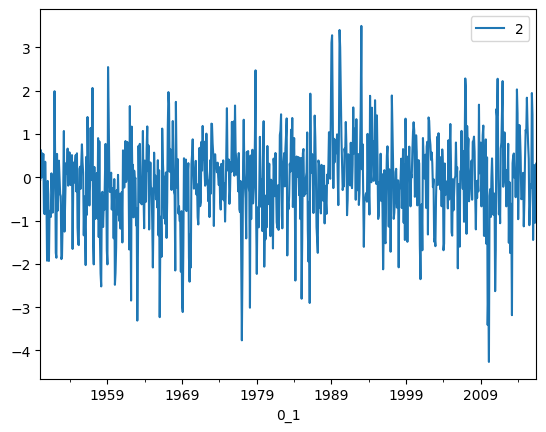

In [36]:
ts.plot();

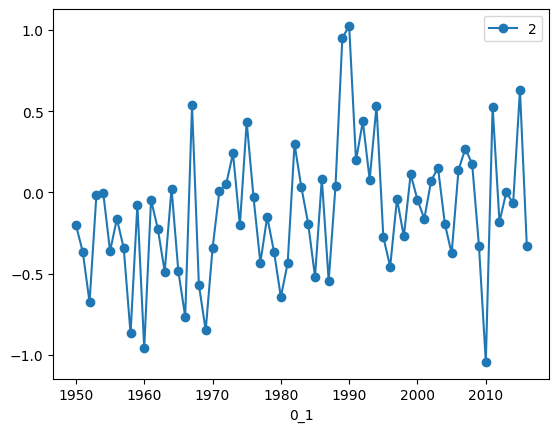

In [37]:
ts.groupby(ts.index.year).mean().plot(marker='o');

Using `pd.Grouper` we can specify more complex groupings.

In [38]:
ts.groupby(pd.Grouper(freq='5Y')).mean().head()

,2
0_1,
1950-12-31,-0.199501
1955-12-31,-0.283744
1960-12-31,-0.481644
1965-12-31,-0.243986
1970-12-31,-0.397825


In [39]:
ts.groupby(pd.Grouper(freq='d')).mean().head()

,2
0_1,
1950-01-01,-0.06031
1950-01-02,NaN
1950-01-03,NaN
1950-01-04,NaN
1950-01-05,NaN


### Resampling
If you do not like the frequency at which your data is sampled you can change the sampling frequency.

In [40]:
nineteenfifty = ts.loc['1950']
nineteenfifty.head()

,2
0_1,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008127
1950-04-01,0.555100
1950-05-01,0.071577


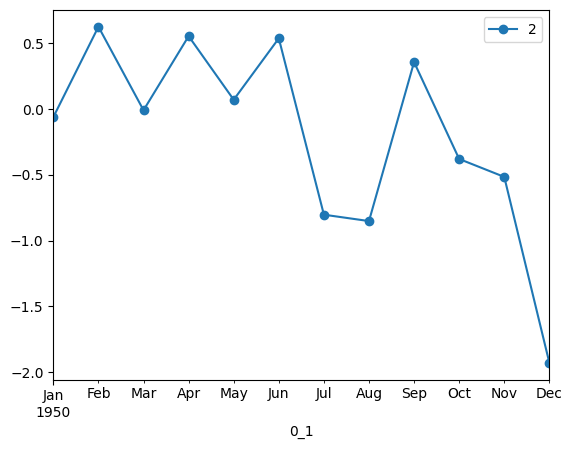

In [41]:
nineteenfifty.plot(marker='o');

In [42]:
nineteenfifty.asfreq('12D', method='ffill').head()

,2
0_1,
1950-01-01,-0.06031
1950-01-13,-0.06031
1950-01-25,-0.06031
1950-02-06,0.62681
1950-02-18,0.62681


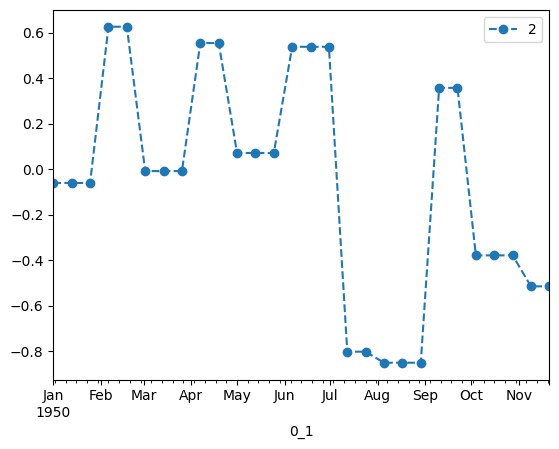

In [43]:
nineteenfifty.asfreq('12D', method='ffill').plot(style='--o');

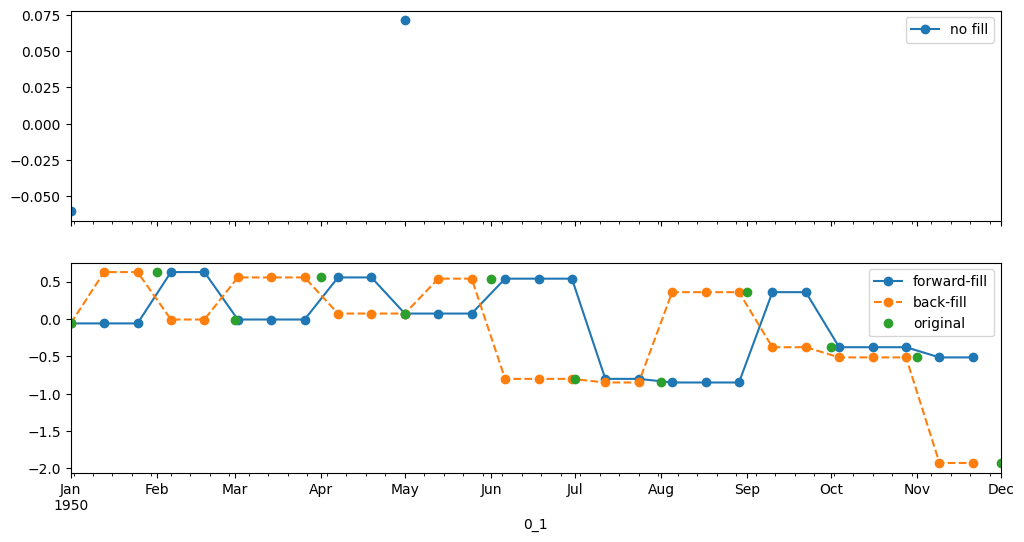

In [44]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(12,6))

# row 1
nineteenfifty.asfreq('12D').plot(ax=ax[0], style='-o') # no fill
# row 2
nineteenfifty.asfreq('12D', method='ffill').plot(ax=ax[1], marker='o') # forward-fill
nineteenfifty.asfreq('12D', method='bfill').plot(ax=ax[1], style='--o') # back-fill
nineteenfifty.plot(ax=ax[1], style='o') # original

ax[0].legend(['no fill'])
ax[1].legend(['forward-fill', 'back-fill', 'original']);

Downsampling can be done by specifying a smaller frequency.

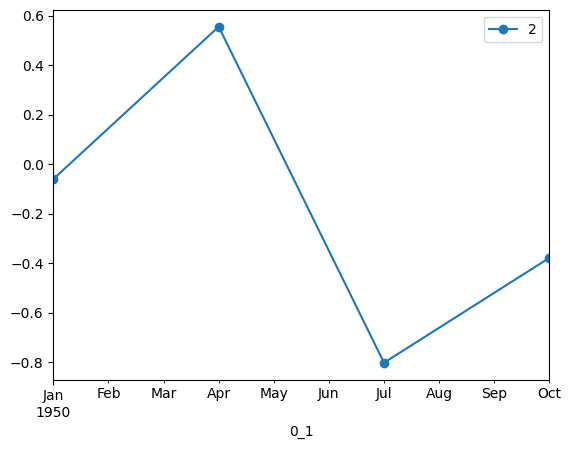

In [45]:
nineteenfifty.asfreq('3M', method='ffill').plot(marker='o');

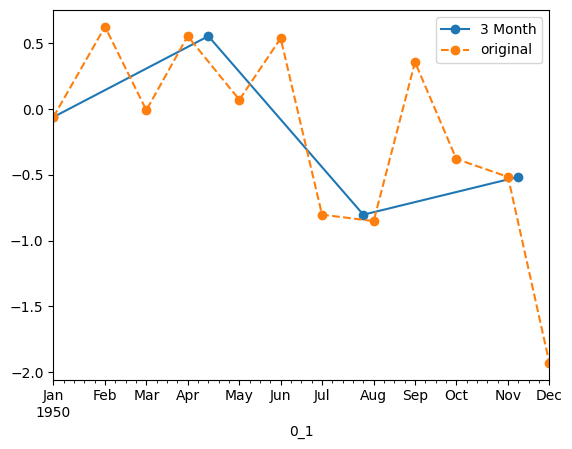

In [46]:
fig, ax = plt.subplots()

nineteenfifty.asfreq('15W', method='ffill').plot(marker='o', ax=ax) # downsampled
nineteenfifty.plot(ax=ax, style='--o') # original

ax.legend(['3 Month', 'original']);

Resampling can also be combined with aggregation using `resample`.
Let's look at some stock data to illustrate this.

In [47]:
yahoo = pd.read_csv('data/yahoo_stock.csv', index_col=0, parse_dates=True)
yahoo.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,12.17,12.85,12.12,12.85,12.85,9514600
2009-01-05,12.72,13.01,12.39,12.86,12.86,11989900
2009-01-06,12.96,13.24,12.88,13.00,13.00,10056000
2009-01-07,12.71,13.16,12.45,12.71,12.71,24995900
2009-01-08,12.37,13.07,12.31,13.07,13.07,14355000


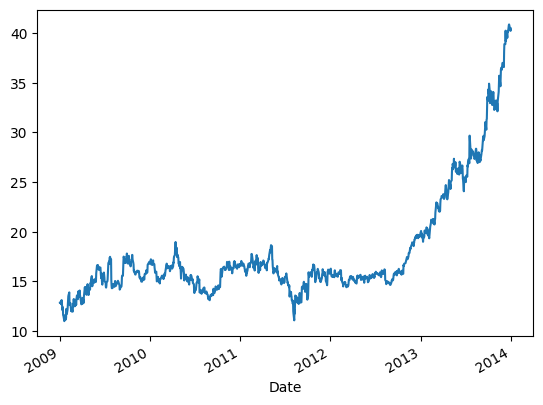

In [48]:
ts = yahoo['Close']
ts.plot();

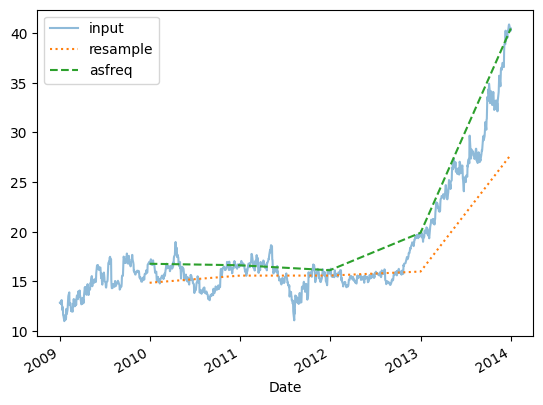

In [49]:
ts.plot(alpha=0.5, style='-')
ts.resample('BA').mean().plot(style=':')
ts.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

### Shifting and Differencing

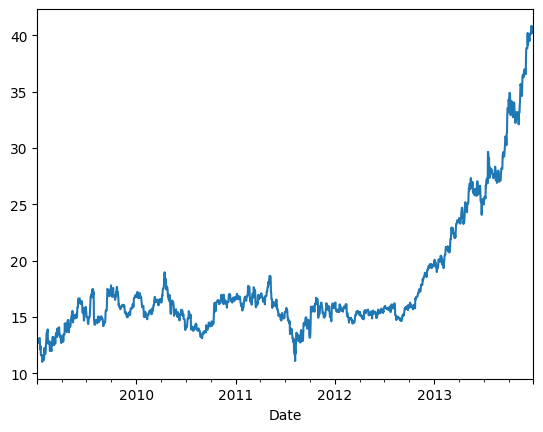

In [50]:
ts_resampled = ts.asfreq('D', method='ffill')
ts_resampled.plot();

Shifting data in time can be done by calling `shift`

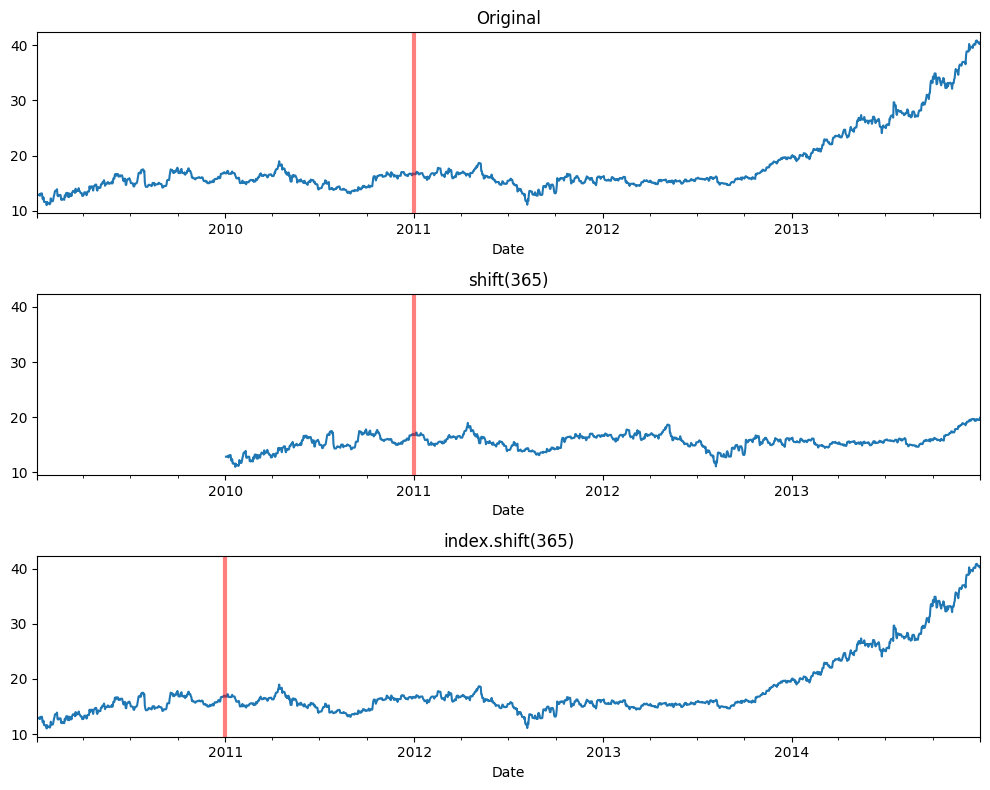

In [51]:
fig, axes = plt.subplots(nrows=3, sharey=True, figsize=(10, 8))

ts_resampled.plot(ax=axes[0], title='Original')
ts_resampled.shift(365).plot(ax=axes[1], title='shift(365)')

ts_resampled.index = ts_resampled.index.shift(365)
ts_resampled.plot(ax=axes[2], title='index.shift(365)')

axes[0].axvline('2011', alpha=0.5, color='r', linewidth=3)
axes[1].axvline('2011', alpha=0.5, color='r', linewidth=3)
axes[2].axvline('2011', alpha=0.5, color='r', linewidth=3)

plt.tight_layout()

Shifting is useful for calculations that compare values across timesteps. An example is differencing to remove trend in the timeseries.

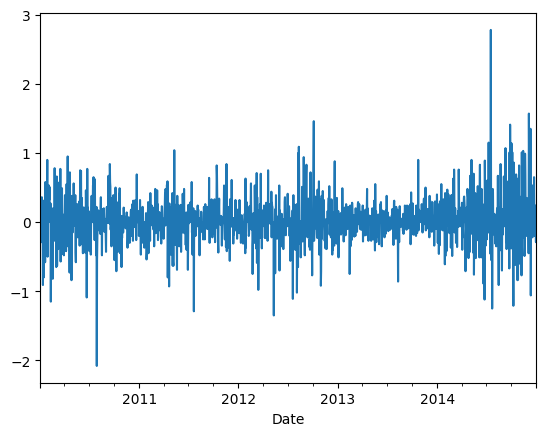

In [52]:
(ts_resampled - ts_resampled.shift(periods=1)).plot();

For differencing, pandas provides the convenient `diff` method.

## Window functions
Window functions are similar to `groupby` as they split data into different groups based on a changing window. The points in each window are aggregated using a summary statistic and then combined back into a timeseries.

### Rolling window
A rolling window is the standard example of a window function. It moves a window of fixed size across the timeseries.

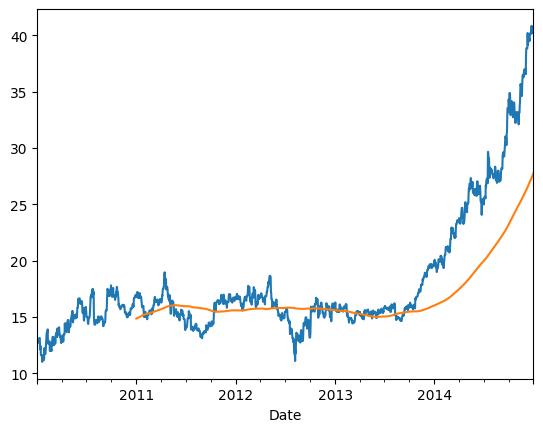

In [54]:
ts_resampled.plot()
ts_resampled.rolling(365).mean().plot();

[Here you can find an exercise](optional_exercises.ipynb#exe03)
<img src="pictures/optex1.png" width="50" style="float: right;"/>